본문 링크 : https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv

Inspiration
- What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
$ Is there any noticeable difference of traffic among different areas and what could be the reason for it?

칼럼 설명
- id : 회원 ID
- name : 이름
- host_id : 호스트 ID
- neighbourhood_group : 근린집단
- neighbourhood : 동네
- latitude : 위도
- longitude : 경도
- room_type : 룸 타입
- price : 가격
- minimum_nights : 최소 숙박일자
- number_of_reviews : 리뷰의 개수
- last_review : 최근 리뷰
- reviews_per_month : 월 평균 리뷰 수
- calculated_host_listings_count : 호스트가 제공하는 아파트(방)의 개수
- availability_365 : an indicator of the total number of days the listing is available for during the year

# 0. 라이브러리 호출 및 기본 정보 조회

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/AB_NYC_2019.csv')
df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
print(df.shape)
df = df.dropna(subset=['reviews_per_month']) 
print(df.shape)

(48895, 16)
(38843, 16)


▲최근 리뷰(이용)이 없는 유령 호스트 제거

# 1. 각 칼럼별 분석

1-1. Room Type 분석

In [9]:
# 방의 타입별로 분류하여 방 세기
room_type = df['room_type'].value_counts()
room_type

Entire home/apt    20332
Private room       17665
Shared room          846
Name: room_type, dtype: int64

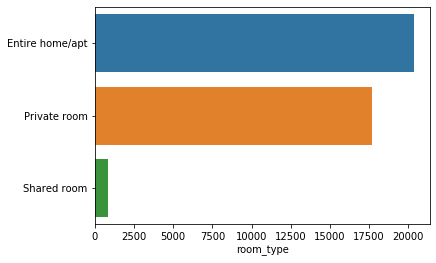

In [10]:
# 방의 타입별로 분류하여 방 세기 - 시각화
sns.barplot(x=room_type, y=room_type.index)

▲ Entire home/apt 가 가장 많다.

room_type
Entire home/apt    196.294068
Private room        83.981093
Shared room         63.213948
Name: price, dtype: float64


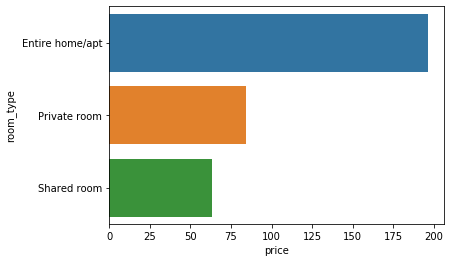

In [11]:
# 방의 타입별 가격 평균 시각화
print(df.groupby('room_type')['price'].mean())
sns.barplot(x=df.groupby('room_type')['price'].mean(),y=df.groupby('room_type')['price'].mean().index)

▲ Entire home/apt 가 가장 비싸다.

--------------------------------------

1-2. 지역별(neighbourhood_group) 분석

In [12]:
df_neighbourhood_group = df['neighbourhood_group'].value_counts()
df_neighbourhood_group

Manhattan        16632
Brooklyn         16447
Queens            4574
Bronx              876
Staten Island      314
Name: neighbourhood_group, dtype: int64

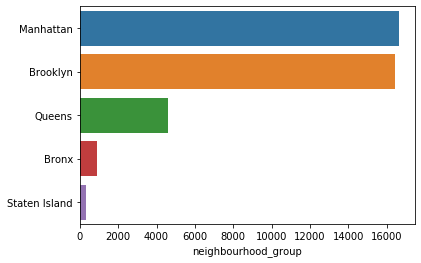

In [13]:
sns.barplot(x=df_neighbourhood_group, y=df_neighbourhood_group.index)

neighbourhood_group
Bronx             79.553653
Brooklyn         121.448714
Manhattan        180.052489
Queens            95.762571
Staten Island     89.964968
Name: price, dtype: float64


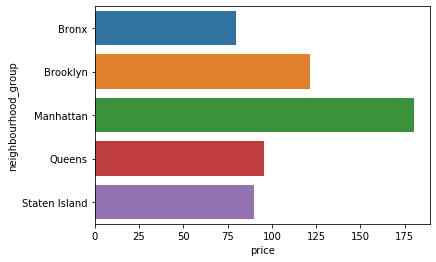

In [14]:
print(df.groupby('neighbourhood_group')['price'].mean())
sns.barplot(x=df.groupby('neighbourhood_group')['price'].mean(),y=df.groupby('neighbourhood_group')['price'].mean().index)

In [15]:
df_neighbourhood = df['neighbourhood'].value_counts()
df_neighbourhood = pd.DataFrame(df_neighbourhood)

In [16]:
df_neighbourhood = df_neighbourhood[df_neighbourhood['neighbourhood'] > 1000]
df_neighbourhood

,neighbourhood
Williamsburg,3163
Bedford-Stuyvesant,3141
Harlem,2206
Bushwick,1944
Hell's Kitchen,1532
East Village,1490
Upper West Side,1482
Upper East Side,1405
Crown Heights,1265


In [17]:
df['price'].mean()

142.317946605566

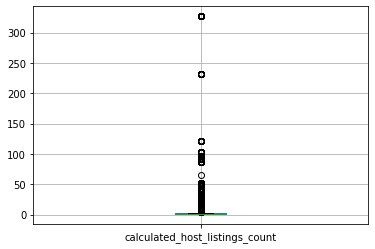

In [18]:
df.boxplot(column=['calculated_host_listings_count'])

In [19]:
price
minimum_nights
number_of_reviews
calculated_host_listings_count

NameError: name 'price' is not defined

C:\Users\44455\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


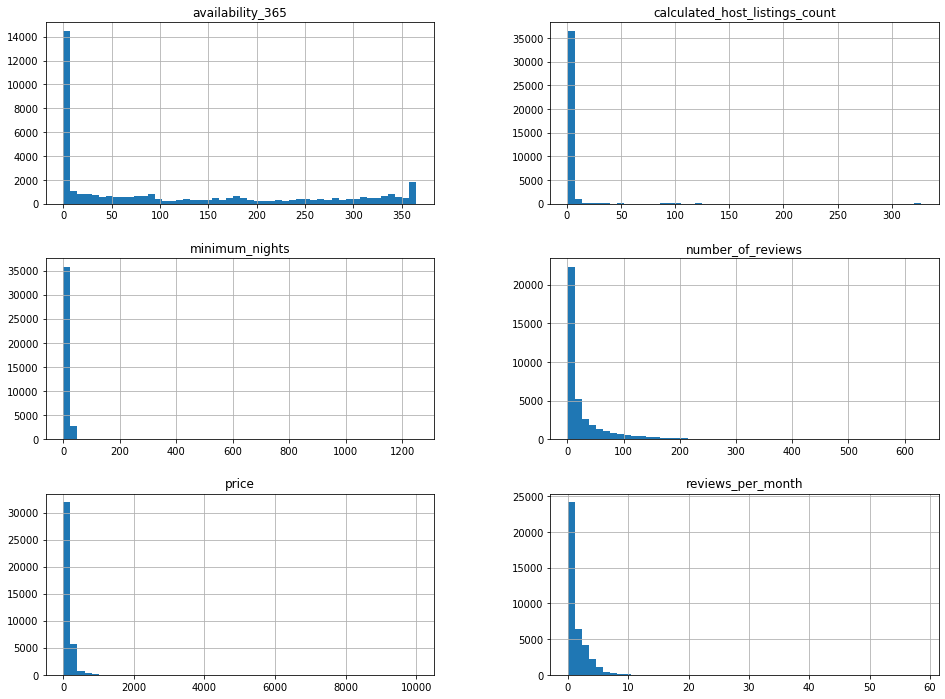

In [20]:
numerical_columns = ['availability_365', 'calculated_host_listings_count', 'reviews_per_month', 
                     'number_of_reviews', 'minimum_nights', 'price']

fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

df[numerical_columns].hist(ax=ax, bins=50)
plt.show()

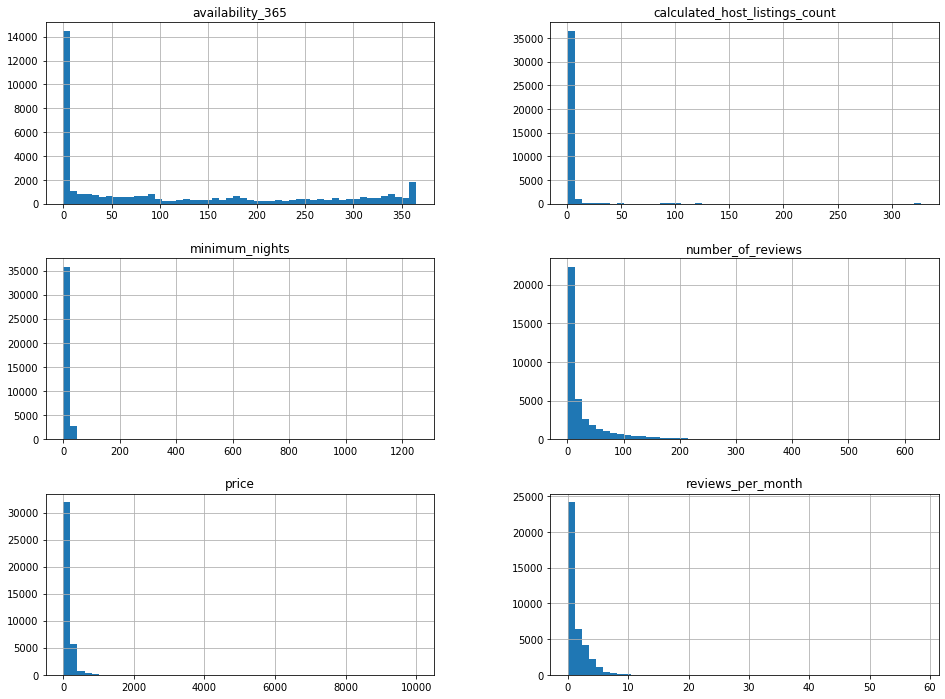

In [21]:
numerical_columns = ['availability_365', 'calculated_host_listings_count', 'reviews_per_month', 
                     'number_of_reviews', 'minimum_nights', 'price']


df[numerical_columns].hist(figsize = (16, 12) , bins=50)
plt.show()

In [22]:
corr = df[numerical_columns].corr(method = 'pearson')
corr

,availability_365,calculated_host_listings_count,reviews_per_month,number_of_reviews,minimum_nights,price
availability_365,1.000000,0.182911,0.185791,0.193557,0.101686,0.078234
calculated_host_listings_count,0.182911,1.000000,-0.009421,-0.059784,0.073479,0.052903
reviews_per_month,0.185791,-0.009421,1.000000,0.549868,-0.121702,-0.030608
number_of_reviews,0.193557,-0.059784,0.549868,1.000000,-0.069368,-0.035938
minimum_nights,0.101686,0.073479,-0.121702,-0.069368,1.000000,0.025506
price,0.078234,0.052903,-0.030608,-0.035938,0.025506,1.000000


In [ ]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 annot=True, 
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)
plt.tight_layout()
plt.show()

In [23]:
df_l = df[numerical_columns]
df_l.head()

,availability_365,calculated_host_listings_count,reviews_per_month,number_of_reviews,minimum_nights,price
0,365,6,0.21,9,1,149
1,355,2,0.38,45,1,225
3,194,1,4.64,270,1,89
4,0,1,0.10,9,10,80
5,129,1,0.59,74,3,200


In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df_l, annot=True, fmt='.3f',cmap='Blues')

In [ ]:
plt.plot('neighbourhood_group', 'price', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('RM')
plt.ylabel('CMEDV')
plt.show()

In [ ]:
sns.pairplot(df[['TV','radio','newspaper','sales']])